### Feature Selection | Feature Extraction

Veri kümenizdeki boyutların sayısını azaltmanın birçok faydası vardır.

Veri kümeniz daha basit hale gelecek ve bu nedenle çalışmak daha kolay olacak, depolamak için daha az disk alanı gerektirecek ve hesaplamalar daha hızlı çalışacak. Ek olarak, modellerin daha az boyuta sahip bir veri kümesine ``overfitting`` olasılığı daha düşüktür.

Boyutluluğu azaltmanın en basit yolu, yalnızca sizin için önemli olan özellikleri veya sütunları daha büyük bir veri kümesinden seçmektir. Buradaki zor kısım, hangi özelliklerin önemli olduğuna karar vermektir.Örneğin, bir kişinin kredi borcunun düşüp düşmeyeceğini tahmin etmek istiyorsanız ve veri setimizde kişinin en sevdiği rengin değişkeni bulunmakta bu değişkenin alakasız olduğunu bilirsiniz.``df.drop("Color" , axis = 1 , inplace = True)`` yöntemi ile kaldırmanız yeterli olacaktır.

Seaborn's pairplot(), küçük ve orta büyüklükteki veri kümelerini görsel olarak keşfetmek için mükemmeldir. Veri kümesindeki her bir sayısal özelliğin bir dağılım grafiği biçiminde birer birer karşılaştırmasını ve çapraz olarak her bir özelliğin dağılımının bir görünümünü sağlar.Şimdi bunu ANSUR adlı ABD ordusu vücut ölçüm veri kümesinin bir örneği üzerinde gösterelim.Veri setine [buradan](https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv) ulaşabilirsiniz.

<p align="center">
  <img src="1.png" width="500"/>
</p>

Pairplot grafiğini incelediğimizde doğrusal değerler gösteren tipler bulunmaktadır.Sabit bir şekilde devam etmektedir.Veri setini de incelediğimizde ``n_legs`` değişkeninin insan bacak sayısını temsil etmekte ve her zaman 2 olmaktadır.Bu gibi sabit değerli değişkenlerimizi veri setinden kaldırmamız gerekecektir.

Özellik seçimi uyguladığımızda, bu örnekteki  gibi bir özelliği ve içerdiği bilgileri veri kümesinden tamamen kaldırırız. Yalnızca alakasız veya çok az benzersiz bilgi içeren özellikleri kaldırarak bilgi kaybını en aza indirmeye çalışıyoruz, ancak bu her zaman mümkün olmuyor.

Feature Selection ile karşılaştırıldığında, Feature Extraction tamamen farklı bir yaklaşımdır, ancak aynı amacı boyutsallığı azaltmaktır. İlk veri kümemizden bir özellik alt kümesi seçmek yerine, orijinal olanlardan yeni özellikleri hesaplıyor veya çıkarıyoruz. Bu yeni özellikler, içlerinde mümkün olduğunca az fazla bilgi içerir ve bu nedenle sayıca daha azdır. Bir dezavantajı, yeni oluşturulan özelliklerin anlaşılmasının genellikle orijinal olanlara göre daha az sezgisel olmasıdır.

<p align="center">
  <img src="feature_selection_extraction.png" width="500"/>
</p>

----

#### t-SNE Visualization of High-Dimensional Data (Yüksek Boyutlu Verilerin t-SNE Görselleştirmesi)

t-SNE, yüksek boyutlu bir uzayda n farklı olan gözlemler arasındaki iki boyutlu uzayda mesafeyi maksimize edecektir. Bu nedenle, benzer gözlemler birbirine yakın olacak ve kümelenmiş hale gelebilecektir.Bu kulağa korkutucu gelse de, Feature Extraction kullanarak yüksek boyutlu verileri görselleştirmek için güçlü bir tekniktir.

ANSUR kadın vücut ölçüleri veri setimiz [buradan](https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv) ulaşabilirsiniz 99 boyuta sahiptir. t-SNE'yi uygulamadan önce, istenmeyen sütun adlarını içeren bir listeyi pandas DataFrame .drop() yöntemine ileterek sayısal olmayan tüm sütunları veri kümesinden kaldıracağız. **t-SNE sayısal olmayan verilerle çalışmaz.** Bunu aşmak için one-hot encoder gibi feature engineering adımını kullanabiliriz ama burada farklı bir yaklaşım kullanacağız.

t-SNE paketini sklearn içerisinden indirmemiz gerekmektedir.``from sklearn.manifold import TSNE``

``learning_rate`` = 50 olan bir TSNE(learning_rate = ) modeli oluşturacağız. t-SNE, veri kümesine uyum sağlarken farklı konfigürasyonları deneyecek ve bunları dahili bir maliyet fonksiyonu ile değerlendirecektir. Yüksek learning_rate algoritmanın denediği konfigürasyonlarda daha maceracı olmasına, düşük learning_rate ise muhafazakar olmasına neden olacaktır. Genellikle, öğrenme oranları 10 ila 1000 aralığındadır. Ardından, TSNE modelini sayısal veri setimize uydurup dönüştüreceğiz. Bu, yüksek boyutlu veri kümemizi iki boyutlu bir NumPy dizisine yansıtacaktır.

In [37]:
import pandas as pd
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

# load the dataset
df = pd.read_csv("ansur_female.csv")
ansur_df = df.copy()
categorical_columns = list(ansur_df.select_dtypes(include = ['object']).columns)
ansur_df.drop(categorical_columns , axis= 1 , inplace=True)

# t-SNE
t_sne = TSNE(learning_rate=50)
tsne_features = t_sne.fit_transform(ansur_df)
pd.DataFrame(tsne_features).head()

,0,1
0,21.024605,5.489126
1,-11.125727,-37.241009
2,-24.624819,-22.594440
3,-19.957947,9.592579
4,-21.650843,35.424698


İki boyutlu bir boyut indirgeme işlemi gerçekleştirdiğini söylebiliriz.Bütün değişkenleri birbiri ile harmanlayarak bir sonuç ortaya atmaktadır.Bunun ardından x ve y değerlerini seçiyor olacağız.x , 0.sütun y değerleri ise 1.sütun olacaktır.

Veri setindeki diğer değişkenlere de ihtiyacımız olduğundan x ve y değerlerini dütun olarak ana veri setimize ekleyeceğiz ve sonrasında ``scatterplot`` ile görselleştirme gerçekleştireceğiz.

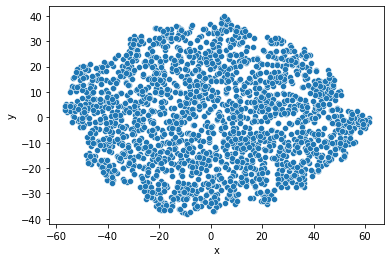

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

sns.scatterplot(x = 'x' , y = 'y' , data = df)
plt.show()

Ortaya çıkan grafik büyük bir kümeyi gösteriyor ve bir anlamda bu beklenebilirdi.Bu grafiği tüm değişkenlerin ortak bir noktada buluşması gibi düşünebiliriz.t-SNE bizim için değişkenler arasındaki varyansı bularak bunları grafik üzerind gösterimini gerçekleştirir.Daha çok büyük boyutlu veri kümelerinde kullanmamız daha iyi görselleştirme sonuçları vermektedir.

Aralarında çok az şey olan farklı kadın vücut şekilleri grupları yoktur, bunun yerine vücut şekillerinin daha sürekli bir dağılımı ve dolayısıyla büyük bir küme vardır. Ancak, analizden çıkardığımız kategorik özellikleri kullanarak, bu küme içinde ilginç yapısal kalıplar olup olmadığını kontrol edebiliriz.

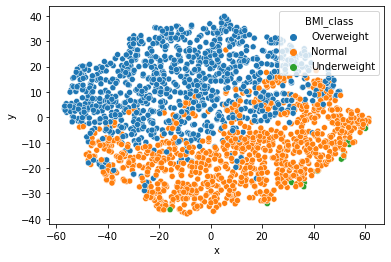

In [39]:
sns.scatterplot(x = 'x' , y = 'y' , data = df ,hue="BMI_class")
plt.show()

TSNE, veri kümesindeki 90'dan fazla özellikten bu ağırlığı aldı ve veri kümesindeki çok fazla varyansı açıklıyor ve bunu, zayıf insanlar solda ve fazla kilolu insanlar sağda olacak şekilde x ekseni boyunca noktalara yaymak için kullandı.

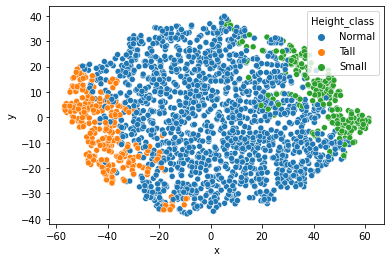

In [40]:
sns.scatterplot(x = 'x' , y = 'y' , data = df ,hue="Height_class")
plt.show()

Dikey yönde, varyansın bir kişinin boyuyla açıklandığını görebileceğiz.Uzun boylu insanlar arsanın en üstünde ve daha kısa insanlar en alttadır. Sonuç olarak, t-SNE, veri setimizi görsel olarak keşfetmemize ve vücut şekillerindeki varyansın en önemli etkenlerini belirlememize yardımcı oldu.

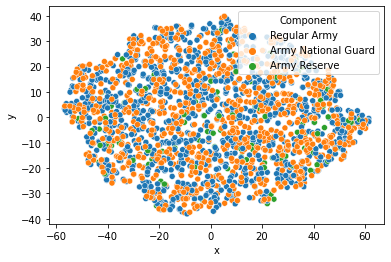

In [42]:
sns.scatterplot(x = 'x' , y = 'y' , data = df , hue="Component")
plt.show()

ABD Ordusunun aktif görev bileşenlerine baktığımızda ``Army National Guard`` bileşenin çok yoğun olarak etkilediğini ve ``Army Reverve`` ona nazaran daha dağınık olduğunu görebiliyoruz.

---



Peki biz bunu ne zaman kullanıcaz.Çok sık kullanılan bir yöntem olmasada **yüksek boyutlu bir veri kümesindeki kalıpları görsel olarak keşfetmek istediğinizde kullanılmaktadır.**